In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Arun\Downloads\Lung Cancer.csv")
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [2]:
df.drop("id",axis=1,inplace=True)

In [3]:
# from ydata_profiling import ProfileReport
# rep=ProfileReport(df,explorative=True)
# rep.to_notebook_iframe()

In [4]:
def iqr(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    fil=df[(df[column]>=lower)&(df[column]<=upper)]
    return fil
col=["age","bmi","cholesterol_level"]
for i in col:
    df=iqr(df,i)

In [5]:

df["diagnosis_date"]=pd.to_datetime(df["diagnosis_date"])
df["end_treatment_date"]=pd.to_datetime(df["end_treatment_date"])
df.dtypes

age                          float64
gender                        object
country                       object
diagnosis_date        datetime64[ns]
cancer_stage                  object
family_history                object
smoking_status                object
bmi                          float64
cholesterol_level              int64
hypertension                   int64
asthma                         int64
cirrhosis                      int64
other_cancer                   int64
treatment_type                object
end_treatment_date    datetime64[ns]
survived                       int64
dtype: object

In [6]:

df["admit_time"]=df["end_treatment_date"]-df["diagnosis_date"]


In [7]:
df["admit_time"]=(df["admit_time"].dt.days).astype(int)

In [8]:
df.drop(columns=["diagnosis_date","end_treatment_date"],inplace=True)

In [9]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,admit_time
0,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0,523
1,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1,424
2,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0,370
3,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0,443
4,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0,406


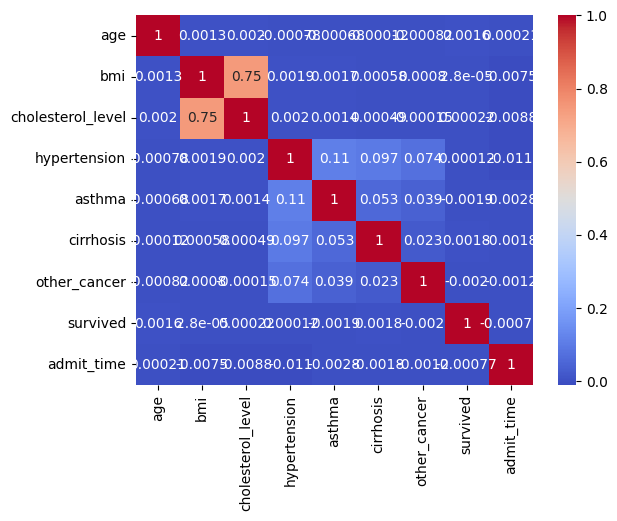

In [44]:
corr=df.corr(numeric_only=True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.Figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [11]:
x=df.drop("survived",axis=1)
y=df["survived"]

In [12]:
print(df.columns)

Index(['age', 'gender', 'country', 'cancer_stage', 'family_history',
       'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'treatment_type', 'survived',
       'admit_time'],
      dtype='object')


In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,PowerTransformer,OneHotEncoder
transform=make_column_transformer(
    (PowerTransformer(),[6]),
    (StandardScaler(),[0,6,7,8,9,10,11,13]),
    (OneHotEncoder(),[1,2,3,4,5,12]),
)


In [14]:
x=transform.fit_transform(x).toarray()

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
x.shape

(886105, 52)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [30]:
model=Sequential()
model.add(Dense(256,input_dim=52,activation="relu"))
# model.add((Dropout(0.3)))
model.add(Dense(128,activation="relu"))
# model.add((Dropout(0.3)))
model.add(Dense(64,activation="relu"))
# model.add((Dropout(0.3)))
model.add(Dense(32,activation="relu"))
# model.add((Dropout(0.3)))
model.add(Dense(1,activation="sigmoid"))


In [31]:

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [32]:
callback=EarlyStopping(
    verbose=1,
    monitor="val_loss",
    patience=5,
    mode="auto",
    restore_best_weights=1

)

In [53]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)

class_weights = dict(enumerate(weights))
print(class_weights) 

{0: 0.6410981302917338, 1: 2.2718165328137316}


In [54]:

hist=model.fit(x_train,y_train,validation_split=0.2,epochs=500,batch_size=1024,callbacks=callback,class_weight=class_weights)

Epoch 1/500
554/554 [==============================] - 3s 4ms/step - loss: 0.6939 - accuracy: 0.5273 - val_loss: 0.7028 - val_accuracy: 0.3280
Epoch 2/500
554/554 [==============================] - 2s 4ms/step - loss: 0.6925 - accuracy: 0.4958 - val_loss: 0.6877 - val_accuracy: 0.5538
Epoch 3/500
554/554 [==============================] - 2s 4ms/step - loss: 0.6919 - accuracy: 0.5057 - val_loss: 0.7014 - val_accuracy: 0.4108
Epoch 4/500
554/554 [==============================] - 2s 4ms/step - loss: 0.6913 - accuracy: 0.5098 - val_loss: 0.6925 - val_accuracy: 0.4999
Epoch 5/500
554/554 [==============================] - 2s 4ms/step - loss: 0.6904 - accuracy: 0.5219 - val_loss: 0.6937 - val_accuracy: 0.5074
Epoch 6/500
554/554 [==============================] - 2s 4ms/step - loss: 0.6890 - accuracy: 0.5290 - val_loss: 0.7042 - val_accuracy: 0.4512
Epoch 7/500
554/554 [==============================] - 2s 4ms/step - loss: 0.6872 - accuracy: 0.5402 - val_loss: 0.7118 - val_accuracy: 0.4432

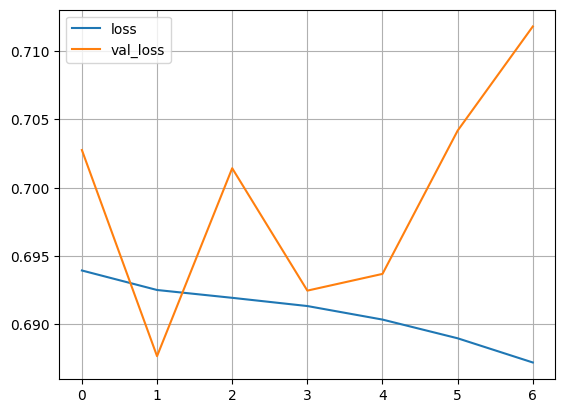

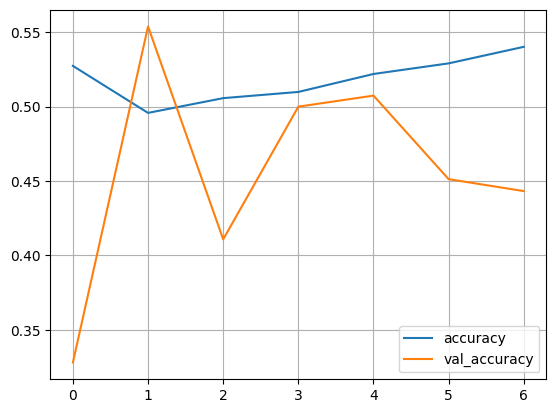

In [55]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.legend()
plt.grid()
plt.show()
plt.plot(hist.history["accuracy"],label="accuracy")
plt.plot(hist.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.grid()
plt.show()

In [57]:
pred=model.predict(x_test,batch_size=1024)

174/174 [==============================] - 0s 3ms/step


In [58]:
pred=(pred>0.5).astype(int)


In [59]:
from catboost import CatBoostClassifier
new=CatBoostClassifier(task_type="GPU",devices="0")
new.fit(x_train,y_train)
newpred=new.predict(x_test)

Learning rate set to 0.023496
0:	learn: 0.6849364	total: 13.5ms	remaining: 13.5s
1:	learn: 0.6771288	total: 31.9ms	remaining: 15.9s
2:	learn: 0.6697091	total: 47.8ms	remaining: 15.9s
3:	learn: 0.6626549	total: 64.4ms	remaining: 16s
4:	learn: 0.6559530	total: 81.9ms	remaining: 16.3s
5:	learn: 0.6495848	total: 96.1ms	remaining: 15.9s
6:	learn: 0.6435340	total: 106ms	remaining: 15s
7:	learn: 0.6377824	total: 123ms	remaining: 15.3s
8:	learn: 0.6323175	total: 140ms	remaining: 15.4s
9:	learn: 0.6271240	total: 157ms	remaining: 15.5s
10:	learn: 0.6221883	total: 173ms	remaining: 15.6s
11:	learn: 0.6174996	total: 187ms	remaining: 15.4s
12:	learn: 0.6130444	total: 204ms	remaining: 15.5s
13:	learn: 0.6088101	total: 218ms	remaining: 15.4s
14:	learn: 0.6047882	total: 231ms	remaining: 15.2s
15:	learn: 0.6009667	total: 243ms	remaining: 15s
16:	learn: 0.5973346	total: 259ms	remaining: 15s
17:	learn: 0.5938845	total: 272ms	remaining: 14.8s
18:	learn: 0.5906044	total: 290ms	remaining: 15s
19:	learn: 0.58

In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
print(accuracy_score(y_test,newpred))
print(accuracy_score(y_test,pred))

print(classification_report(y_test,newpred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,newpred))
print(confusion_matrix(y_test,pred))
print(roc_auc_score(y_test,pred))


0.7793207351273269
0.5529987981108334
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138112
           1       0.00      0.00      0.00     39109

    accuracy                           0.78    177221
   macro avg       0.39      0.50      0.44    177221
weighted avg       0.61      0.78      0.68    177221

              precision    recall  f1-score   support

           0       0.78      0.59      0.67    138112
           1       0.22      0.41      0.29     39109

    accuracy                           0.55    177221
   macro avg       0.50      0.50      0.48    177221
weighted avg       0.66      0.55      0.59    177221

[[138112      0]
 [ 39109      0]]
[[81907 56205]
 [23013 16096]]
0.5023076706504332


C:\Users\Arun\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arun\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arun\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [61]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 552867, 1: 156017}
